# Ondřejov Spectra Preprocessing

In [1]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
seaborn.set_style('ticks')

## Ondřejov Dataset

In [3]:
spectra = pandas.read_csv('ondrejov-dataset.csv', index_col='id')
spectra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12936 entries, a201305230017 to we200016
Columns: 151 entries, dec to 6732.0
dtypes: float64(142), int64(2), object(7)
memory usage: 15.0+ MB


### Metadata

In [4]:
spectra.iloc[:, :11].head()

,dec,gratang,detector,expval,object,dichmir,chipid,ra,specfilt,label,date-obs
id,,,,,,,,,,,
a201305230017,-11:09:40.70,30.25,PyLoN 2048x512BX,19.246130,alp Vir,2,E2V 42-10 BX,13:25:11.580,1,absorption,2013-05-23
a201306060015,+19:10:56.60,30.25,PyLoN 2048x512BX,0.009187,alp Boo,2,E2V 42-10 BX,14:15:39.667,1,absorption,2013-06-06
a201306060016,+19:10:56.60,30.25,PyLoN 2048x512BX,0.012332,alp Boo,2,E2V 42-10 BX,14:15:39.667,1,absorption,2013-06-06
a201306060018,+33:21:45.60,30.25,PyLoN 2048x512BX,5.056532,beta Lyr,2,E2V 42-10 BX,18:50:04.787,1,emission,2013-06-06
a201306060019,+33:21:45.60,30.25,PyLoN 2048x512BX,15.040130,beta Lyr,2,E2V 42-10 BX,18:50:04.787,1,emission,2013-06-06


In [5]:
spectra['label'].value_counts()

absorption     6102
emission       5301
double-peak    1533
Name: label, dtype: int64

### Spectral Data

In [6]:
X = spectra.iloc[:, 11:].as_matrix()
X.shape

(12936, 140)

### Labels

In [7]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(spectra['label'])
le.inverse_transform([0, 1, 2])

array(['absorption', 'double-peak', 'emission'], dtype=object)

## Data Visualization

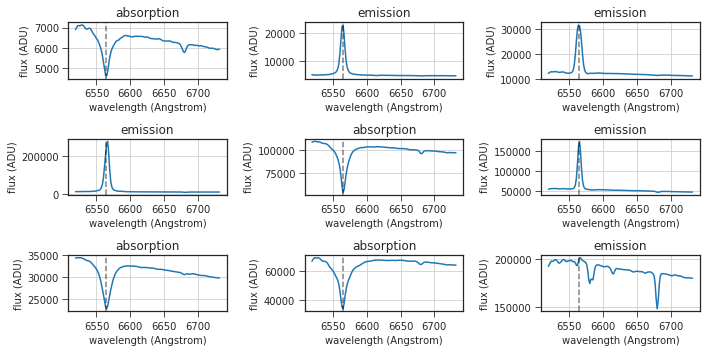

In [8]:
# http://classic.sdss.org/dr7/products/spectra/vacwavelength.html
HALPHA = 6564.614
# waveleghts from https://github.com/podondra/ondrejov-dataset
WAVES = numpy.linspace(6519, 6732, 140)

def plot_flux(flux, title=None, ax=None):
    if ax is None:
        ax = pyplot.subplot()

    ax.plot(WAVES, flux)
    ax.set_ylabel('flux (ADU)')
    ax.set_xlabel('wavelength (Angstrom)')
    ax.axvline(HALPHA, color='black', linestyle='dashed', alpha=0.5)
    ax.grid()
    
    if title is not None:
        ax.set_title(title)

nrows = 3
ncols = 3
n_idxs = nrows * ncols
rnd_idxs = numpy.random.choice(len(X), size=n_idxs, replace=False)
f, axes = pyplot.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5))
for ax, idx in zip(axes.flat, rnd_idxs):
    plot_flux(X[idx], title=spectra.iloc[idx]['label'], ax=ax)
f.tight_layout()

### PCA

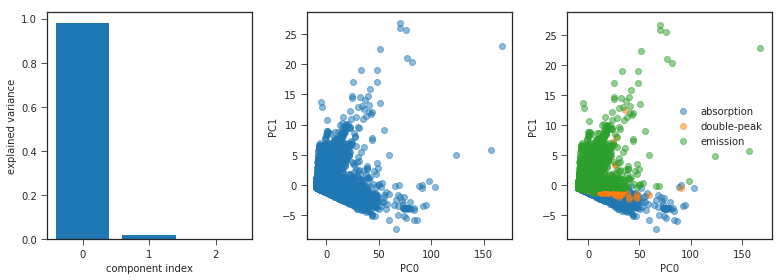

In [9]:
def plot_pca(X_pca):
    f, (ax1, ax2, ax3) = pyplot.subplots(ncols=3, figsize=(11, 4))

    ax1.bar(numpy.arange(pca.n_components_), pca.explained_variance_ratio_)
    ax1.set_xlabel('component index')
    ax1.set_ylabel('explained variance')

    ax2.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

    for label, cls in enumerate(le.classes_):
        ax3.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=cls, alpha=0.5)
    ax3.legend()

    for ax in ax2, ax3:
        ax.set_xlabel('PC0')
        ax.set_ylabel('PC1')

    f.tight_layout()

pca = PCA(n_components=3)
plot_pca(pca.fit_transform(preprocessing.scale(X, axis=0)))

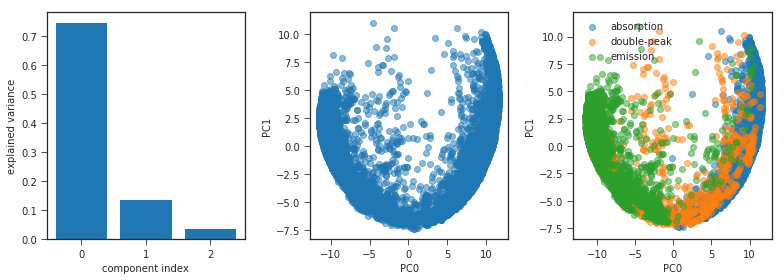

In [10]:
pca = PCA(n_components=3)
plot_pca(pca.fit_transform(preprocessing.scale(X, axis=1)))

### t-SNE

### LDA